In [13]:
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')

def merge_dataframes(df1, df2):
    import pandas as pd
    # Concatenate the dataframes along the index
    merged_df = pd.concat([df1, df2], axis=0)
    # Group by the index and aggregate the values
    merged_df = merged_df.groupby(merged_df.index).first()
    return merged_df

In [14]:
metadata = pd.read_excel("metadata/full_overview_WGS.xlsx", sheet_name="metadata2")[["run", "age"]].set_index("run")
metadata.dropna(inplace=True)
metadata.head()

,age
run,
SRR22079353,10.0
SRR22079355,12.0
SRR22079357,10.0
SRR22079358,9.0
SRR22079360,10.0


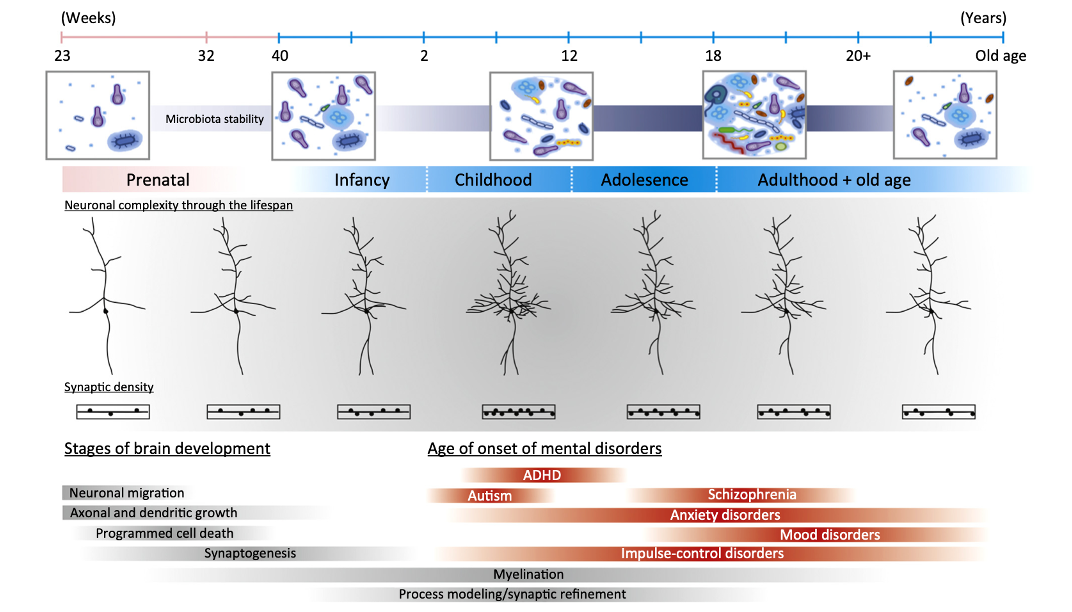

In [15]:
inputs = "datasets"
for dirpath, dirnames, filenames in os.walk(inputs):
    for file in filenames:
        if file.endswith(".csv") and "age" not in file:
            file_path = os.path.join(dirpath, file)
            print(f"\nFile: {file}")
            dataframe = pd.read_csv(file_path, low_memory=False).set_index("run")
            display(dataframe.head())

            metadata_filtered = metadata.loc[metadata.index.intersection(dataframe.index)]#.set_index("run")

            dataframe = merge_dataframes(metadata_filtered, dataframe)
            dataframe.dropna(subset=['age'], inplace=True)

            
            file = file[:-4]
            
            dataframe_0_10 = dataframe[(dataframe['age'] > 0) & (dataframe['age'] <= 10)] # Prenatal: Up to 10 months (40 weeks)
            dataframe_0_10.reset_index(inplace=True)
            rows, columns = dataframe_0_10.shape
            if rows > 0:
                dataframe_0_10.to_csv(f"datasets/{file}-age-prenatal.csv", index=False)
                print("new file:", f"{file}-age-prenatal.csv", dataframe_0_10.shape)
            else: print (f"{file}-age-prenatal.csv doesn't have any samples.")
            del dataframe_0_10
            
            dataframe_10_24 = dataframe[(dataframe['age'] > 10) & (dataframe['age'] <= 24)] # Infancy (10 months to 2 years)
            dataframe_10_24.reset_index(inplace=True)
            rows, columns = dataframe_10_24.shape
            if rows > 0:
                dataframe_10_24.to_csv(f"datasets/{file}-age-infancy.csv", index=False)
                print("new file:", f"{file}-age-infancy.csv", dataframe_10_24.shape)
            else: print (f"{file}-age-infancy.csv doesn't have any samples.")
            del dataframe_10_24
            
            dataframe_24_144 = dataframe[(dataframe['age'] > 24) & (dataframe['age'] <= 144)] # Childhood (2 to 12 years)
            dataframe_24_144.reset_index(inplace=True)
            rows, columns = dataframe_24_144.shape
            if rows > 0:
                dataframe_24_144.to_csv(f"datasets/{file}-age-childhood.csv", index=False)
                print("new file:", f"{file}-age-childhood.csv", dataframe_24_144.shape)
            else: print (f"{file}-age-childhood.csv doesn't have any samples.")
            del dataframe_24_144
            
            dataframe_144_more = dataframe[dataframe['age'] > 144] # Adolescence: 12+ years
            dataframe_144_more.reset_index(inplace=True)
            rows, columns = dataframe_144_more.shape
            if rows > 0:
                dataframe_144_more.to_csv(f"datasets/{file}-age-adolescence.csv", index=False)
                print("new file:", f"{file}-age-adolescence.csv", dataframe_144_more.shape)
            else: print (f"{file}-age-adolescence.csv doesn't have any samples.")
            del dataframe_144_more
            
            del dataframe


File: metabolites-jan.csv


,bioProject,locationCountry,locationContinent,diagnosis,instrument,ADMA,ADMA.SDMA.,adrenic.acid,alpha.muricholate,arachidonic.acid,...,undecanedionate,uracil,urobilin,urobilin.,X2.hydroxymyristic.acid,X2.hydroxyphenethylamine,X3.methyladipate.pimelate,X3.methylxanthine,X7.methylguanine,xanthine
run,,,,,,,,,,,,,,,,,,,,,
ERR2608606,PRJEB23052,China,Asia,TD,Illumina HiSeq 4000,0.000154,0.000130,6.712499e+09,0.000621,0.000750,...,2.827067e+09,0.000543,0.000248,9.499667e+09,2.374312e+09,1.103502e-04,3.510611e+09,2.572750e+08,0.000264,0.001333
ERR2608607,PRJEB23052,China,Asia,TD,Illumina HiSeq 4000,0.000226,0.000147,7.734759e+09,0.000354,0.000808,...,2.166008e+09,0.000526,0.000137,7.128131e+09,2.367083e+09,1.206007e-04,1.116694e+09,3.511586e+09,0.000363,0.001548
ERR2608608,PRJEB23052,China,Asia,TD,Illumina HiSeq 4000,0.000202,0.000114,7.917122e+09,0.000305,0.000759,...,1.723631e+09,0.000604,0.000174,8.486936e+09,3.063627e+09,1.248476e-04,1.515135e+09,2.753618e+08,0.000286,0.001274
ERR2608609,PRJEB23052,China,Asia,TD,Illumina HiSeq 4000,0.000189,0.000136,5.901586e+08,0.000414,0.000767,...,3.289113e+09,0.000573,0.000291,1.223345e-04,2.280995e+09,9.813093e+08,1.088965e+09,3.178390e+09,0.000312,0.001446
ERR2608610,PRJEB23052,China,Asia,TD,Illumina HiSeq 4000,0.000164,0.000133,4.703504e+09,0.000514,0.000671,...,5.733408e+09,0.000543,0.000714,2.992671e-04,3.564778e+09,1.140519e-04,5.807696e+09,3.068990e+08,0.000330,0.001512


metabolites-jan-age-prenatal.csv doesn't have any samples.
new file: metabolites-jan-age-infancy.csv (5, 87)
new file: metabolites-jan-age-childhood.csv (156, 87)
metabolites-jan-age-adolescence.csv doesn't have any samples.

File: pathways.csv


,bioProject,locationCountry,locationContinent,diagnosis,instrument,1CMET2-PWY: folate transformations III (E. coli),1CMET2-PWY: folate transformations III (E. coli)|g__Akkermansia.s__Akkermansia_muciniphila,1CMET2-PWY: folate transformations III (E. coli)|g__Alistipes.s__Alistipes_finegoldii,1CMET2-PWY: folate transformations III (E. coli)|g__Alistipes.s__Alistipes_onderdonkii,1CMET2-PWY: folate transformations III (E. coli)|g__Alistipes.s__Alistipes_putredinis,...,VALSYN-PWY: L-valine biosynthesis|g__Streptococcus.s__Streptococcus_macedonicus,VALSYN-PWY: L-valine biosynthesis|g__Streptococcus.s__Streptococcus_mutans,VALSYN-PWY: L-valine biosynthesis|g__Streptococcus.s__Streptococcus_peroris,VALSYN-PWY: L-valine biosynthesis|g__Streptococcus.s__Streptococcus_sp_HPH0090,VALSYN-PWY: L-valine biosynthesis|g__Streptococcus.s__Streptococcus_vestibularis,VALSYN-PWY: L-valine biosynthesis|g__Sutterella.s__Sutterella_sp_CAG_351,VALSYN-PWY: L-valine biosynthesis|g__Sutterella.s__Sutterella_sp_CAG_397,VALSYN-PWY: L-valine biosynthesis|g__Terrisporobacter.s__Terrisporobacter_othiniensis,VALSYN-PWY: L-valine biosynthesis|g__Turicimonas.s__Turicimonas_muris,VALSYN-PWY: L-valine biosynthesis|g__Varibaculum.s__Varibaculum_cambriense
run,,,,,,,,,,,,,,,,,,,,,
ERR2608606,PRJEB23052,China,Asia,TD,Illumina HiSeq 4000,0.005928,0.000000,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ERR2608607,PRJEB23052,China,Asia,TD,Illumina HiSeq 4000,0.008602,0.000000,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ERR2608608,PRJEB23052,China,Asia,TD,Illumina HiSeq 4000,0.009052,0.000985,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ERR2608609,PRJEB23052,China,Asia,TD,Illumina HiSeq 4000,0.007143,0.000000,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ERR2608610,PRJEB23052,China,Asia,TD,Illumina HiSeq 4000,0.006569,1.970130,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


new file: pathways-age-prenatal.csv (15, 27775)
new file: pathways-age-infancy.csv (14, 27775)
new file: pathways-age-childhood.csv (216, 27775)
pathways-age-adolescence.csv doesn't have any samples.

File: full-wgs.csv


,bioProject,locationCountry,locationContinent,diagnosis,instrument,AllGroups_ace,AllGroups_ace_lci,AllGroups_ace_hci,AllGroups_bergerparker,AllGroups_boneh,...,VALSYN-PWY: L-valine biosynthesis|g__Streptococcus.s__Streptococcus_macedonicus,VALSYN-PWY: L-valine biosynthesis|g__Streptococcus.s__Streptococcus_mutans,VALSYN-PWY: L-valine biosynthesis|g__Streptococcus.s__Streptococcus_peroris,VALSYN-PWY: L-valine biosynthesis|g__Streptococcus.s__Streptococcus_sp_HPH0090,VALSYN-PWY: L-valine biosynthesis|g__Streptococcus.s__Streptococcus_vestibularis,VALSYN-PWY: L-valine biosynthesis|g__Sutterella.s__Sutterella_sp_CAG_351,VALSYN-PWY: L-valine biosynthesis|g__Sutterella.s__Sutterella_sp_CAG_397,VALSYN-PWY: L-valine biosynthesis|g__Terrisporobacter.s__Terrisporobacter_othiniensis,VALSYN-PWY: L-valine biosynthesis|g__Turicimonas.s__Turicimonas_muris,VALSYN-PWY: L-valine biosynthesis|g__Varibaculum.s__Varibaculum_cambriense
run,,,,,,,,,,,,,,,,,,,,,
ERR2608606,PRJEB23052,China,Asia,TD,Illumina HiSeq 4000,19889431.0,17566101.0,31747928.0,0.465909,1.956357e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ERR2608607,PRJEB23052,China,Asia,TD,Illumina HiSeq 4000,11013514.0,10118308.0,18682510.0,0.586957,7.875520e-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ERR2608608,PRJEB23052,China,Asia,TD,Illumina HiSeq 4000,15738684.0,13479634.0,28637725.0,0.465909,1.283355e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ERR2608609,PRJEB23052,China,Asia,TD,Illumina HiSeq 4000,13088670.0,12127056.0,21328189.0,0.215909,8.022490e-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ERR2608610,PRJEB23052,China,Asia,TD,Illumina HiSeq 4000,21962345.0,17345556.0,42419989.0,0.243902,1.902841e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


new file: full-wgs-age-prenatal.csv (15, 928444)
new file: full-wgs-age-infancy.csv (14, 928444)
new file: full-wgs-age-childhood.csv (216, 928444)
full-wgs-age-adolescence.csv doesn't have any samples.

File: enzymes.csv


,bioProject,locationCountry,locationContinent,diagnosis,instrument,LIMONENE-6-@MONOOXYGENASE-@RXN,LIMONENE-6-MONOOXYGENASE-RXN|g__Clostridium.s__Clostridium_perfringens,--LIMONENE-6-MONOOXYGENASE-RXN|g__Enterobacter.s__Enterobacter_cloacae_complex,--LIMONENE-6-MONOOXYGENASE-RXN|g__Escherichia.s__Escherichia_coli,--LIMONENE-6-MONOOXYGENASE-RXN|g__Klebsiella.s__Klebsiella_michiganensis,...,XYLULOKIN-RXN|g__Megasphaera.s__Megasphaera_elsdenii,XYLULOKIN-RXN|g__Mitsuokella.s__Mitsuokella_multacida,XYLULOKIN-RXN|g__Murimonas.s__Murimonas_intestini,XYLULOKIN-RXN|g__Pedobacter.s__Pedobacter_himalayensis,XYLULOKIN-RXN|g__Phytobacter.s__Phytobacter_ursingii,XYLULOKIN-RXN|g__Propionibacterium.s__Propionibacterium_freudenreichii,XYLULOKIN-RXN|g__Robinsoniella.s__Robinsoniella_sp_RHS,XYLULOKIN-RXN|g__Ruminococcus.s__Ruminococcus_sp_CAG_579,XYLULOKIN-RXN|g__Streptococcus.s__Streptococcus_agalactiae,XYLULOKIN-RXN|g__Weissella.s__Weissella_confusa
run,,,,,,,,,,,,,,,,,,,,,
ERR2608606,PRJEB23052,China,Asia,TD,Illumina HiSeq 4000,3.0700,0.0,0.0,2.3000,0.0266,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ERR2608607,PRJEB23052,China,Asia,TD,Illumina HiSeq 4000,0.0855,0.0,0.0,0.0000,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ERR2608608,PRJEB23052,China,Asia,TD,Illumina HiSeq 4000,0.3360,0.0,0.0,0.0747,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ERR2608609,PRJEB23052,China,Asia,TD,Illumina HiSeq 4000,0.0765,0.0,0.0,0.0000,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ERR2608610,PRJEB23052,China,Asia,TD,Illumina HiSeq 4000,0.0525,0.0,0.0,0.0000,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


new file: enzymes-age-prenatal.csv (15, 393732)
new file: enzymes-age-infancy.csv (14, 393732)
new file: enzymes-age-childhood.csv (216, 393732)
enzymes-age-adolescence.csv doesn't have any samples.

File: genes.csv


,bioProject,locationCountry,locationContinent,diagnosis,instrument,UniRef90_A0A009DWL0,UniRef90_A0A009DWL0|unclassified,UniRef90_A0A009E282,UniRef90_A0A009E282|unclassified,UniRef90_A0A009E8P9,...,XYLULOKIN-RXN|g__Ruminococcus.s__Ruminococcus_sp_CAG_579,XYLULOKIN-RXN|g__Ruthenibacterium.s__Ruthenibacterium_lactatiformans,XYLULOKIN-RXN|g__Sellimonas.s__Sellimonas_intestinalis,XYLULOKIN-RXN|g__Streptococcus.s__Streptococcus_agalactiae,XYLULOKIN-RXN|g__Subdoligranulum.s__Subdoligranulum_sp_APC924_74,XYLULOKIN-RXN|g__Tyzzerella.s__Tyzzerella_nexilis,XYLULOKIN-RXN|g__Tyzzerella.s__Tyzzerella_sp,XYLULOKIN-RXN|g__Victivallales_unclassified.s__Victivallales_bacterium_CCUG_44730,XYLULOKIN-RXN|g__Weissella.s__Weissella_confusa,XYLULOKIN-RXN|unclassified
run,,,,,,,,,,,,,,,,,,,,,
ERR2608606,PRJEB23052,China,Asia,TD,Illumina HiSeq 4000,0.0,0.0,0.0,0.0,0.001229,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ERR2608607,PRJEB23052,China,Asia,TD,Illumina HiSeq 4000,0.0,0.0,0.0,0.0,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ERR2608608,PRJEB23052,China,Asia,TD,Illumina HiSeq 4000,0.0,0.0,0.0,0.0,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ERR2608609,PRJEB23052,China,Asia,TD,Illumina HiSeq 4000,0.0,0.0,0.0,0.0,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ERR2608610,PRJEB23052,China,Asia,TD,Illumina HiSeq 4000,0.0,0.0,0.0,0.0,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


new file: genes-age-prenatal.csv (15, 859870)
new file: genes-age-infancy.csv (14, 859870)
new file: genes-age-childhood.csv (216, 859870)
genes-age-adolescence.csv doesn't have any samples.

File: taxonomy.csv


,bioProject,locationCountry,locationContinent,diagnosis,instrument,k__Archaea,k__Archaea|p__Euryarchaeota,k__Archaea|p__Euryarchaeota|c__Methanobacteria,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae,...,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Caudovirales|f__Siphoviridae|g__Sp31virus,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Caudovirales|f__Siphoviridae|g__Sp31virus|s__Salmonella_virus_SP31,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Viruses_unclassified|f__Adenoviridae|g__Mastadenovirus|s__Human_mastadenovirus_G,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Viruses_unclassified|f__Adenoviridae|g__Mastadenovirus|s__Simian_mastadenovirus_C,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Viruses_unclassified|f__Adenoviridae|g__Mastadenovirus|s__Simian_mastadenovirus_F,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Viruses_unclassified|f__Inoviridae,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Viruses_unclassified|f__Inoviridae|g__Inoviridae_unclassified,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Viruses_unclassified|f__Inoviridae|g__Inoviridae_unclassified|s__Escherichia_virus_If1,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Viruses_unclassified|f__Viruses_unclassified|g__Viruses_unclassified|s__Pseudomonas_phage_PA16,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Viruses_unclassified|f__Viruses_unclassified|g__Viruses_unclassified|s__Streptococcus_phage_SW11
run,,,,,,,,,,,,,,,,,,,,,
ERR2608606,PRJEB23052,China,Asia,TD,Illumina HiSeq 4000,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ERR2608607,PRJEB23052,China,Asia,TD,Illumina HiSeq 4000,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ERR2608608,PRJEB23052,China,Asia,TD,Illumina HiSeq 4000,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ERR2608609,PRJEB23052,China,Asia,TD,Illumina HiSeq 4000,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ERR2608610,PRJEB23052,China,Asia,TD,Illumina HiSeq 4000,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


new file: taxonomy-age-prenatal.csv (15, 1426)
new file: taxonomy-age-infancy.csv (14, 1426)
new file: taxonomy-age-childhood.csv (216, 1426)
taxonomy-age-adolescence.csv doesn't have any samples.
